In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [2]:
df = pd.read_csv('data.csv')

### 데이터 확인

In [3]:
df

,Timestamp,OUTPUT_COUNT_DAY_1,KO6_MOTOR_SET_FREQ,CUTTING_SET_FREQ,STATUS,KO5_MOTOR_SET_FREQ,METAL_OIL_SUPPLY_PRESS_CONTR,KO4_MOTOR_SET_FREQ,KO2_MOTOR_SET_FREQ,MAIN_MOTOR_CURR,...,METAL_TEMP_CUT,KO5_MOTOR_INVERTER_ALM,MAIN_MOTOR_SET_FREQ,KO1_MOTOR_INVERTER_ALM,TRANS_POS_DOWN_SET_H,OUTPUT_COUNT_DAY_2,OUTPUT_COUNT_SUM,TRANS_POS_DOWN,TRANS_POS_RIGHT,MAIN_MOTOR_ALM
0,2022-05-02 06:32:33,25878.0,3000.0,3000.0,0.0,3000.0,661.166,3000.0,3000.0,2192.50,...,7.5,0.5,2166.5,0.5,2000.0,25881.0,27510.0,1159.5,1741.75,0.0
1,2022-05-02 06:32:34,25878.0,3000.0,3000.0,0.0,3000.0,798.000,3000.0,3000.0,4108.00,...,7.5,0.5,2166.5,0.5,2000.0,25881.0,27510.0,1159.5,2322.57,0.0
2,2022-05-02 06:32:35,25878.0,3000.0,3000.0,0.0,3000.0,794.000,3000.0,3000.0,4158.00,...,7.5,0.5,2166.5,0.5,2000.0,25881.0,27510.0,1159.5,2322.42,0.0
3,2022-05-02 06:32:36,25878.0,3000.0,3000.0,0.0,3000.0,788.600,3000.0,3000.0,4118.00,...,7.5,0.5,2166.5,0.5,2000.0,25881.0,27510.0,1159.5,2322.50,0.0
4,2022-05-02 06:32:37,25878.0,3000.0,3000.0,0.0,3000.0,804.200,3000.0,3000.0,4063.00,...,7.5,0.5,2166.5,0.5,2000.0,25881.0,27510.0,1159.5,2322.57,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579292,2022-05-14 04:34:32,29160.0,6000.0,6000.0,0.0,6000.0,254.875,6000.0,6000.0,3905.00,...,44.0,1.0,4333.0,1.0,4000.0,29160.0,1879.0,2319.0,2322.50,0.0
579293,2022-05-14 04:34:33,29160.0,6000.0,6000.0,0.0,6000.0,254.875,6000.0,6000.0,3905.00,...,44.0,1.0,4333.0,1.0,4000.0,29160.0,1879.0,2319.0,2322.50,0.0
579294,2022-05-14 04:34:39,29160.0,6000.0,6000.0,0.0,6000.0,254.875,6000.0,6000.0,3905.00,...,44.0,1.0,4333.0,1.0,4000.0,29160.0,1879.0,2319.0,2322.50,0.0
579295,2022-05-14 04:34:40,29160.0,6000.0,6000.0,0.0,6000.0,262.579,6000.0,6000.0,3900.42,...,44.0,1.0,4333.0,1.0,4000.0,29160.0,1879.0,2319.0,2322.50,0.0


---
### 메인모터랑 status 상관관계

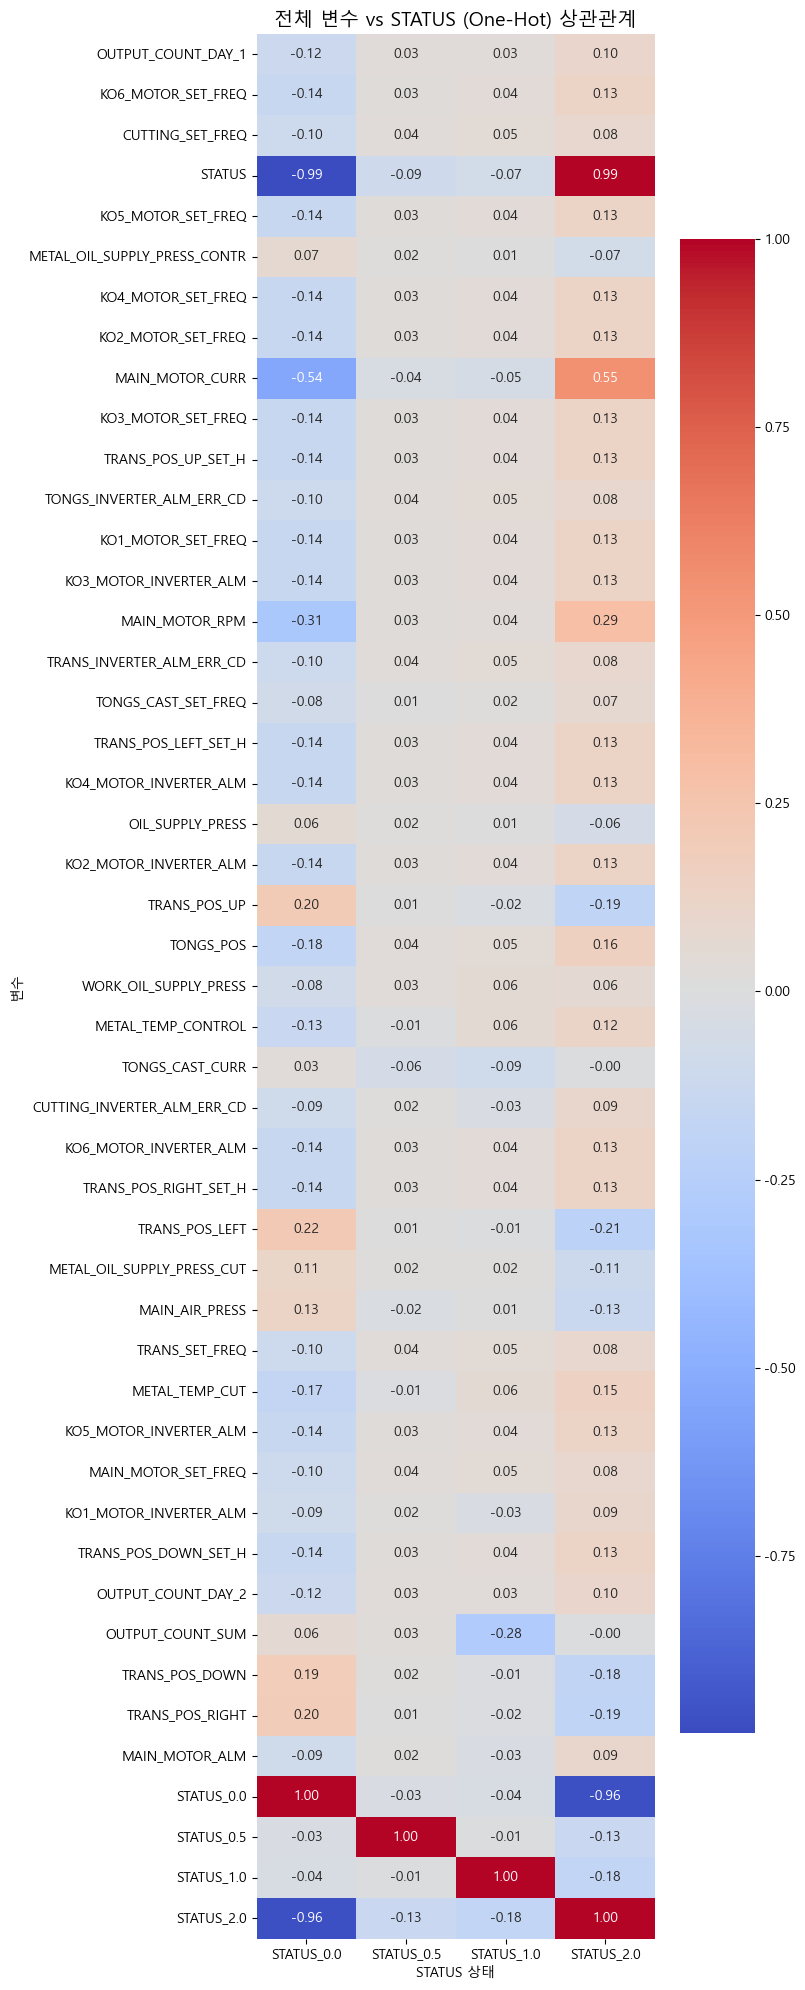

In [4]:
# 1. STATUS 원핫 인코딩
status_dummies = pd.get_dummies(df['STATUS'], prefix='STATUS')

# 2. 기존 데이터프레임에서 숫자형 변수만 추출
numeric_df = df.select_dtypes(include='number')

# 3. STATUS One-Hot을 원래 데이터와 결합
combined_df = pd.concat([numeric_df, status_dummies], axis=1)

# 4. 상관관계 계산
corr_matrix = combined_df.corr().loc[status_dummies.columns]

# 5. 히트맵 시각화
plt.figure(figsize=(8, 20))  # 가로 좁게, 세로 길게 조정
sns.heatmap(corr_matrix.T, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("전체 변수 vs STATUS (One-Hot) 상관관계", fontsize=14)
plt.xlabel("STATUS 상태")
plt.ylabel("변수")
plt.tight_layout()
plt.show()

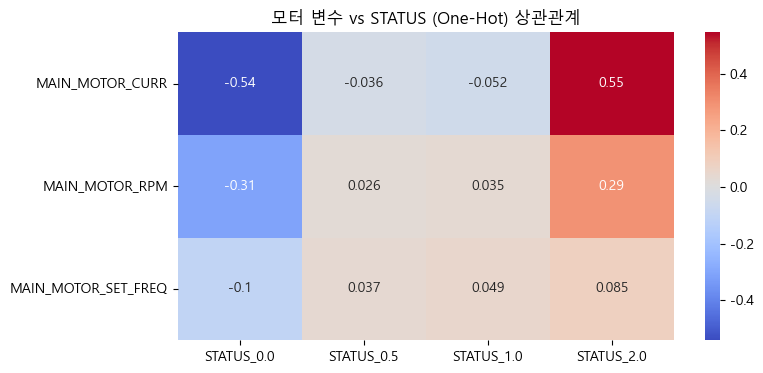

In [5]:
# 1. 필요한 컬럼만 선택
cols = ['STATUS', 'MAIN_MOTOR_CURR', 'MAIN_MOTOR_RPM', 'MAIN_MOTOR_SET_FREQ']
df_subset = df[cols].dropna()

# 2. STATUS를 One-Hot 인코딩
df_encoded = pd.get_dummies(df_subset, columns=['STATUS'])

# 3. 상관관계 계산
corr = df_encoded.corr()

# 4. 모터 관련 컬럼과 STATUS_* 간 상관관계만 추출
motor_cols = ['MAIN_MOTOR_CURR', 'MAIN_MOTOR_RPM', 'MAIN_MOTOR_SET_FREQ']
status_cols = [col for col in df_encoded.columns if col.startswith('STATUS_')]

corr_subset = corr.loc[motor_cols, status_cols]

# 5. 시각화
plt.figure(figsize=(8, 4))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm')
plt.title("모터 변수 vs STATUS (One-Hot) 상관관계")
plt.show()


---
### 하나의 사이클에서 상관관계
- unique 하나인게 생겨서 안나오는 컬럼도 많음

In [6]:
df12 = pd.read_csv('cycle_9.csv')

In [9]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30673 entries, 0 to 30672
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     30673 non-null  object 
 1   OUTPUT_COUNT_DAY_1            30673 non-null  float64
 2   KO6_MOTOR_SET_FREQ            30673 non-null  float64
 3   CUTTING_SET_FREQ              30673 non-null  float64
 4   STATUS                        30673 non-null  float64
 5   KO5_MOTOR_SET_FREQ            30673 non-null  float64
 6   METAL_OIL_SUPPLY_PRESS_CONTR  30673 non-null  float64
 7   KO4_MOTOR_SET_FREQ            30673 non-null  float64
 8   KO2_MOTOR_SET_FREQ            30673 non-null  float64
 9   MAIN_MOTOR_CURR               30673 non-null  float64
 10  KO3_MOTOR_SET_FREQ            30673 non-null  float64
 11  TRANS_POS_UP_SET_H            30673 non-null  float64
 12  TONGS_INVERTER_ALM_ERR_CD     30673 non-null  float64
 13  K

In [15]:
numeric_df = df12.drop(columns=['CYCLE','Timestamp','DAY_1_DIFF'])
# 결측치 많은 컬럼 확인
print(numeric_df.isnull().sum())

# 고정값(값이 하나만 있는 컬럼) 확인
print(numeric_df.nunique())

# 데이터 타입 확인
print(numeric_df.dtypes)

OUTPUT_COUNT_DAY_1              0
KO6_MOTOR_SET_FREQ              0
CUTTING_SET_FREQ                0
STATUS                          0
KO5_MOTOR_SET_FREQ              0
METAL_OIL_SUPPLY_PRESS_CONTR    0
KO4_MOTOR_SET_FREQ              0
KO2_MOTOR_SET_FREQ              0
MAIN_MOTOR_CURR                 0
KO3_MOTOR_SET_FREQ              0
TRANS_POS_UP_SET_H              0
TONGS_INVERTER_ALM_ERR_CD       0
KO1_MOTOR_SET_FREQ              0
KO3_MOTOR_INVERTER_ALM          0
MAIN_MOTOR_RPM                  0
TRANS_INVERTER_ALM_ERR_CD       0
TONGS_CAST_SET_FREQ             0
TRANS_POS_LEFT_SET_H            0
KO4_MOTOR_INVERTER_ALM          0
OIL_SUPPLY_PRESS                0
KO2_MOTOR_INVERTER_ALM          0
TRANS_POS_UP                    0
TONGS_POS                       0
WORK_OIL_SUPPLY_PRESS           0
METAL_TEMP_CONTROL              0
TONGS_CAST_CURR                 0
CUTTING_INVERTER_ALM_ERR_CD     0
KO6_MOTOR_INVERTER_ALM          0
TRANS_POS_RIGHT_SET_H           0
TRANS_POS_LEFT

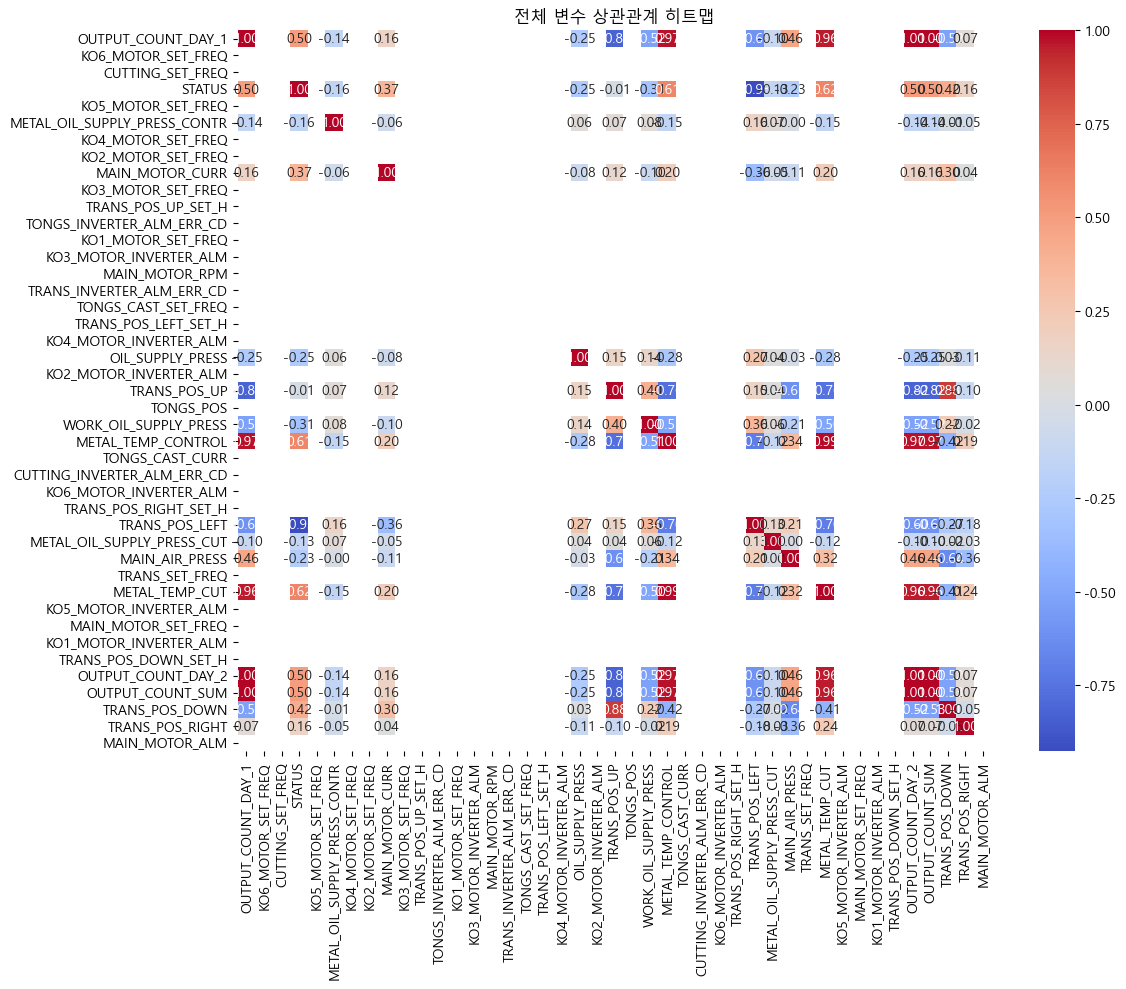

In [ ]:
# 모든 컬럼들의 상관관계 파악
corr_matrix_12 = numeric_df.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_12, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("전체 변수 상관관계 히트맵")
plt.tight_layout()
plt.show()